In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

breast_cancer = load_breast_cancer()
print(breast_cancer.data)
print(breast_cancer.data.shape)


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


In [5]:
breast_cancer.keys()

['target', 'DESCR', 'target_names', 'feature_names', 'data', 'filename']

In [8]:
print(breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [54]:
bc_df = pd.DataFrame(breast_cancer.data)
bc_df.columns = breast_cancer.feature_names
bc_df['PROGNOSIS'] = breast_cancer.target

bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,PROGNOSIS
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


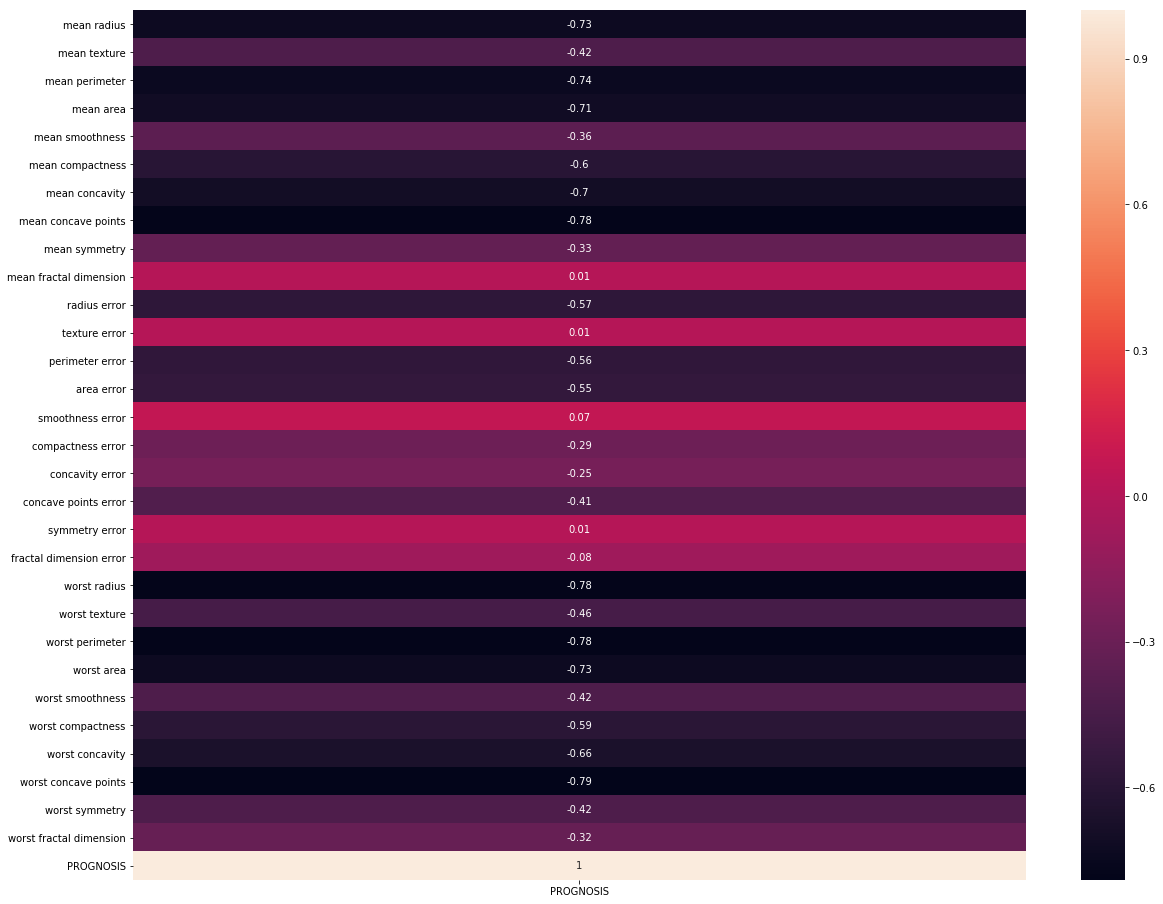

In [21]:
f, ax = plt.subplots(figsize=(20,16))
corr = bc_df.corr().round(2)
sns.heatmap(corr[['PROGNOSIS']],
           yticklabels=corr.columns.values, annot=True)

From the heatmap above I am able to see a high negative correlation between the prognosis and most of the features of the datset. *The features with the highest correlations are listed below.*

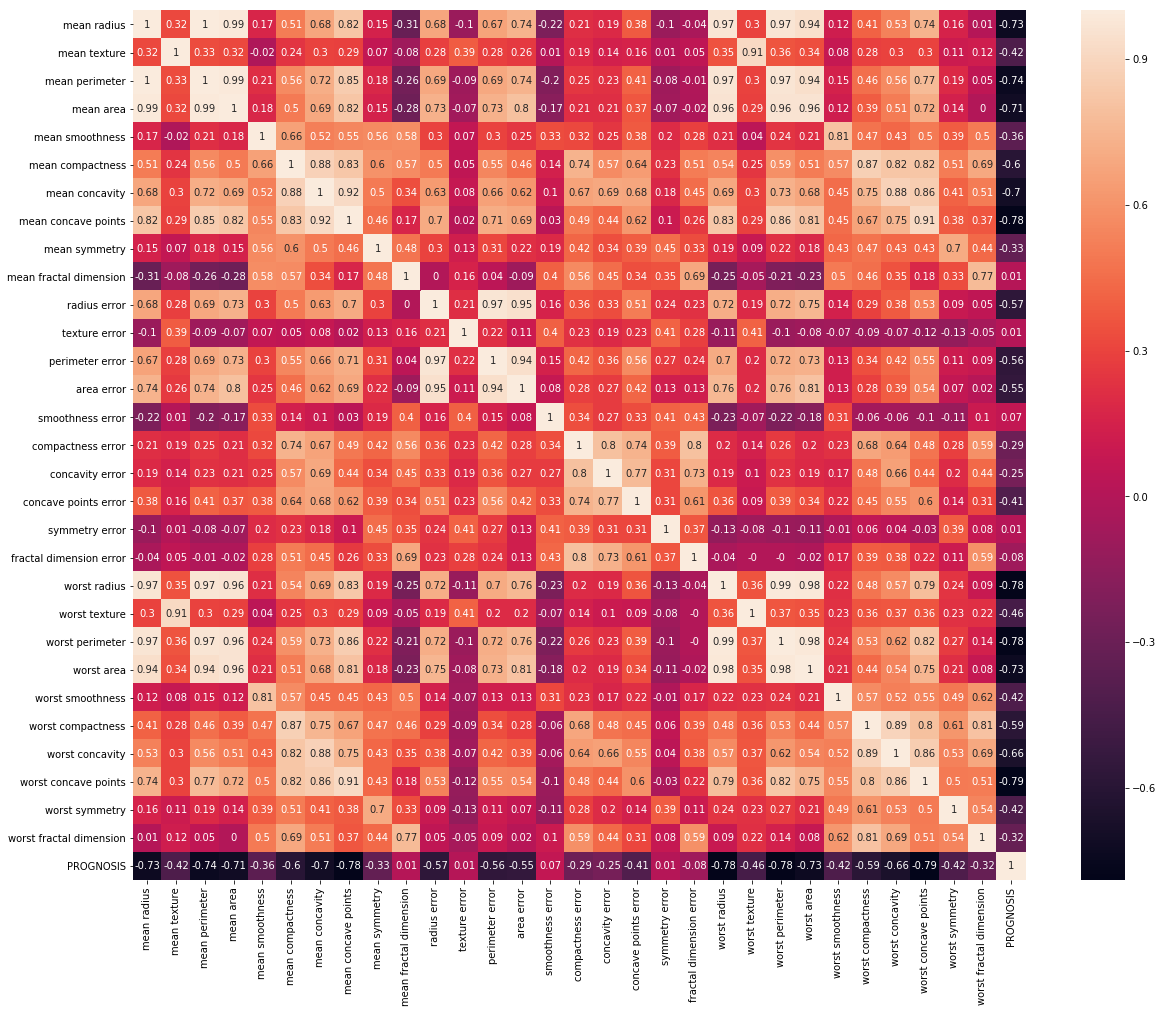

In [25]:
f, ax = plt.subplots(figsize=(20,16))
corr = bc_df.corr().round(2)
sns.heatmap(corr, xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, annot=True)

In [53]:
#Correlation with output variable
cor_target = abs(corr["PROGNOSIS"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

mean radius             0.73
mean perimeter          0.74
mean area               0.71
mean compactness        0.60
mean concavity          0.70
mean concave points     0.78
radius error            0.57
perimeter error         0.56
area error              0.55
worst radius            0.78
worst perimeter         0.78
worst area              0.73
worst compactness       0.59
worst concavity         0.66
worst concave points    0.79
PROGNOSIS               1.00
Name: PROGNOSIS, dtype: float64

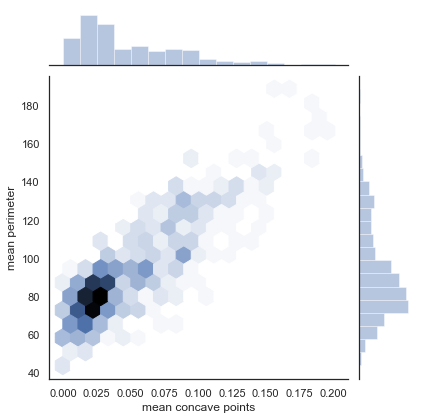

In [76]:
#visuals for comparing highly correlated features

sns.set(style="white")
sns.color_palette("Blues")

g = sns.jointplot("mean concave points", "mean perimeter", data=bc_df, kind="hex")

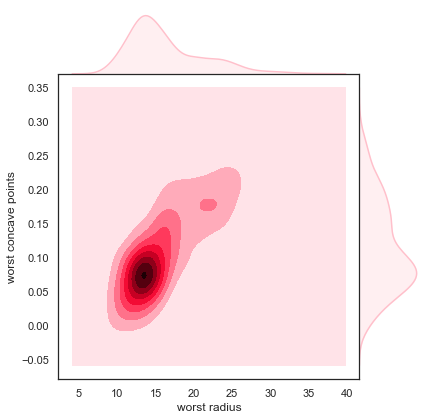

In [61]:
g = sns.jointplot("worst radius", "worst concave points", data=bc_df, kind="kde", space=0, color="pink")

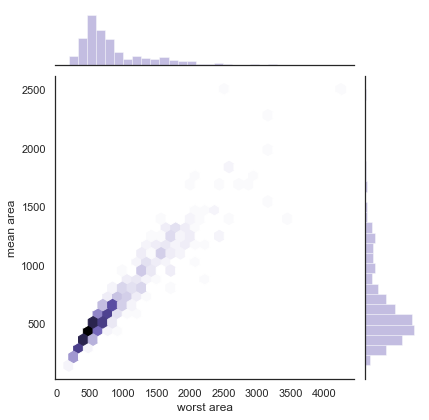

In [75]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set(style="white")

g = sns.jointplot("worst area", "mean area", data=bc_df, kind="hex", color="#695bb4")

In [81]:
#labels malignant or benign prognosis
def label(target):
    label = ["Malignant" if k==1 else "Benign" for k in target]
    return label

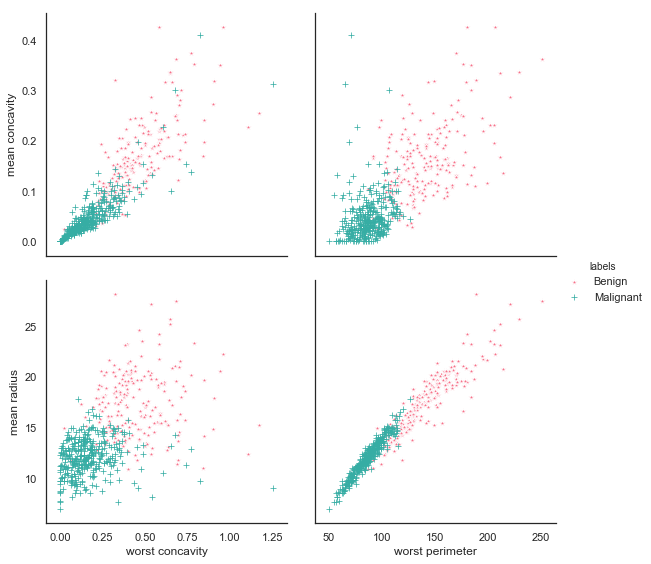

In [93]:
#pair plot to show distribution of benign and malignant
bc_df["labels"] = label(bc_df["PROGNOSIS"])
g = sns.pairplot(bc_df, x_vars=["worst concavity", "worst perimeter"], y_vars=["mean concavity", "mean radius"],
                 height=4, hue='labels', palette="husl", markers=["*", "+"])



In [31]:
#creating x and y values
features = bc_df.loc[:, bc_df.columns != 'PROGNOSIS']
X = np.array(features)
y = bc_df['PROGNOSIS'].values

In [35]:
#splitting data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(426, 30)
(143, 30)
(426,)
(143,)


In [40]:
#creating svm model
from sklearn import svm

svm_clf = svm.SVC(kernel='linear', C=10)
svm_clf.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [44]:
#number of support vectors
svm_clf.n_support_

array([18, 18], dtype=int32)

In [45]:
#list of support vectors
svm_clf.support_vectors_

array([[1.669e+01, 2.020e+01, 1.071e+02, ..., 8.737e-02, 4.677e-01,
        7.623e-02],
       [1.499e+01, 2.520e+01, 9.554e+01, ..., 2.899e-02, 1.565e-01,
        5.504e-02],
       [1.245e+01, 1.570e+01, 8.257e+01, ..., 1.741e-01, 3.985e-01,
        1.244e-01],
       ...,
       [1.366e+01, 1.913e+01, 8.946e+01, ..., 1.407e-01, 2.744e-01,
        8.839e-02],
       [1.495e+01, 1.877e+01, 9.784e+01, ..., 8.405e-02, 2.852e-01,
        9.218e-02],
       [1.453e+01, 1.934e+01, 9.425e+01, ..., 9.594e-02, 2.471e-01,
        7.463e-02]])

In [46]:
#get weight and intercept
weight = svm_clf.coef_
intercept = svm_clf.intercept_
print(weight)
print(intercept)

[[ 1.76857159e+00  8.99846101e-02 -7.03021070e-03 -1.44518546e-02
  -1.43459764e+00 -7.98629746e-01 -1.56048764e+00 -1.94258464e+00
  -2.96566575e+00 -4.16507562e-02 -6.80614379e-01  1.87481439e+00
   7.77252400e-01 -1.88413517e-01 -1.21617863e-01  1.52732158e+00
   1.06075235e+00 -1.32166204e-01  2.04571262e-02  3.09817931e-01
   9.43865628e-01 -4.60472487e-01 -2.67598054e-01 -1.19001008e-03
  -2.27151260e+00 -7.67898514e-01 -4.77494562e+00 -3.47380745e+00
  -5.85147395e+00 -6.46141306e-02]]
[16.37810316]


In [48]:
#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)
print(y_pred)

[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


In [ ]:
#evaluating model
from sklearn import metrics



In [34]:
#preprocesssing data with Standard scaler
# from sklearn import preprocessing

# s_scaler = preprocessing.StandardScaler()
# X_scaler = s_scaler.fit_transform(X_train)
# X_test_sc = s_scaler.transform(X_test)

In [26]:
#find pca and then do a heatmap and do svm over with reduced dimensions

## Resources

- [Feature Selection With Pandas](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)
- [Multicollinearity in Data Science](https://towardsdatascience.com/multicollinearity-in-data-science-c5f6c0fe6edf)
- [Zillow EDA On Missing Values Multicollinearity](https://www.kaggle.com/viveksrinivasan/zillow-eda-on-missing-values-multicollinearity)
- [Support Vector Machines with Scikit-learn](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)
- [seaborne.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Principal Component Analysis and SVM in a Pipeline with Python](https://towardsdatascience.com/visualizing-support-vector-machine-decision-boundary-69e7591dacea)